In [37]:
!pip install bertopic
!pip install swifter

In [38]:
from bertopic import BERTopic
import spacy
import pandas as pd
import numpy as np
import seaborn as sns
import swifter
import csv
import sys
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

In [39]:
df = pd.read_csv("df_after_EDA_with_agents_reduction.csv", index_col=0)
df

,title,text,organisation,date,category,year,month
0,Interoperability of messaging services – a gam...,Interoperability of messaging services is one ...,S&amp;D - Socialists &amp; Democrats in the Eu...,2022-03-24 23:00:00+00:00,InfoSociety,2022,3
1,S&Ds welcome the use of cohesion funds in EU r...,The Socialists and Democrats in the European P...,S&amp;D - Socialists &amp; Democrats in the Eu...,2022-03-24 23:00:00+00:00,Euro & Finance,2022,3
2,Roaming calls within the EU remain cheap and i...,The European Parliament has adopted the new ru...,S&amp;D - Socialists &amp; Democrats in the Eu...,2022-03-24 23:00:00+00:00,InfoSociety,2022,3
3,S&Ds welcome the Strategic Compass as a big st...,"One month ago, Vladimir Putin gave Russian tro...",S&amp;D - Socialists &amp; Democrats in the Eu...,2022-03-24 23:00:00+00:00,Security,2022,3
4,S&Ds: Russia’s war on Ukraine shows we need a ...,Following the criminal Russian invasion agains...,S&amp;D - Socialists &amp; Democrats in the Eu...,2022-03-23 23:00:00+00:00,Agriculture & Food,2022,3
...,...,...,...,...,...,...,...
4551,Unanimous support for report on organ donation,A report by GUE/NGL MEP Adamos Adamou (Cyprus)...,GUE/NGL Group in the EP,2008-03-28 14:37:11+00:00,Health & Consumers,2008,3
4552,Commission policy strategy out of touch with p...,Responding to the Commission's statement outli...,GUE/NGL Group in the EP,2008-03-13 09:07:50+00:00,EU Priorities 2020,2008,3
4553,European Parliament’s Hearing on the “Laval ca...,At the exchange of views yesterday between MEP...,CEEP - European Centre of Employers and Enterp...,2008-02-29 09:21:34+00:00,Social Europe & Jobs,2008,2
4554,CEEP wants the mission for flexicurity to have...,After the announcement of the setting up of a ...,CEEP - European Centre of Employers and Enterp...,2008-02-14 15:47:51+00:00,Social Europe & Jobs,2008,2


# Modelowanie tematów

In [40]:
from sklearn.feature_extraction import text 

additional_stop_words = ['eu', 'europe']
stop_words = text.ENGLISH_STOP_WORDS.union(additional_stop_words)

In [41]:
count_vectorizer = CountVectorizer(stop_words=stop_words, min_df=5)

In [42]:
topic_model = BERTopic(embedding_model="all-MiniLM-L6-v2", vectorizer_model=count_vectorizer)

In [43]:
dfs = df#.sample(frac = .1) #raczej tylko do sprawdzania czy coś działa
dfs = dfs.reset_index(drop=True)

In [44]:
 topics, probs = topic_model.fit_transform(dfs['text'])

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/612 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/350 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


In [45]:
topic_model.get_topic(0)

[('tax', 0.07390451168523884),
 ('taxation', 0.01950993888522333),
 ('havens', 0.015177373518765878),
 ('vat', 0.014112255424453012),
 ('avoidance', 0.01393811321486945),
 ('taxes', 0.012996900866883267),
 ('evasion', 0.011187402656219826),
 ('corporate', 0.011185279600900317),
 ('companies', 0.010820017939402276),
 ('rate', 0.010791472929310533)]

In [46]:
topic_model.visualize_barchart()

Wyjaśnienia słów:
- ceep - Central Europe Energy Partners - stowarzyszenie non-profit sektora energii
- wto - World Trade Organization. Głównym zadaniem Światowej Organizacji Handlu jest liberalizacja międzynarodowego handlu dobrami i usługami, prowadzenie polityki inwestycyjnej wspierającej handel
- mff - Multiannual Financial Framework - budżet Unii Europejskiej na siedem lat


In [47]:
topic_model.visualize_heatmap(top_n_topics=30)

Powiązanie tematów z konkretnymi wydarzeniami:
- 4 - 24 czerwca 2019 r. – Visa ogłosiła zawarcie strategicznego porozumienia z Western Union, globalnym liderem międzynarodowych walutowych przekazów pieniężnych. Współpraca z Western Union polega na wdrożeniu Visa Direct, platformy Visa obsługującej w czasie rzeczywistym tzw. push payments
- 9 - Porozumienie paryskie – porozumienie wieńczące 21 Konferencję ONZ w sprawie zmian klimatu
- 11 - Latin America Assembly - organ podobny do Parlamentu Europejskiego w Ameryce Łacińskiej
- 14 - sme - Small and medium-sized enterprises
- 16 - The American Assembly - Organizacja non-profit w Nowym Jorku
- 21 - Joseph Daul – w latach 2013–2019 przewodniczący Europejskiej Partii Ludowej
- 25 - youth guarantee - porozumienie państw członkowskich UE, dotyczące zapewnienia osobom poniżej 30 roku życia możliwości pracy i edukacji


Korelacje pomiędzy tematami:
- Temat 0 (Central Europe Energy Partners, services, public) - gender equality (1, 0.76), eu budget (4, 0.8), agriculture (20, 0.8), renewable energy (5, 0.74)
- Temat 2 (acca, students, professional) - latin_america_assembly (11, 0.73)
- Temat 11 - Latin America Assembly - data protection agreement (9, 0.76), small & medium enterprises (15, 0.79)
- Temat 13 (russia, ukraine) - 2021 Enlargement Package(kraje bałkańskie) (2, 0.77), data protection agreement (9, 0.75), refugees migration (16, 0.78), hungary & orban (22, 0.76)
- Temat 18 (epp - European People's party) - trade china (28, 0.78)
- Temat 25 (youth guarantee) - laundering money crime (26, 0.78), food_health_labelling (8, 0.75)


In [48]:
topics_per_organisations = topic_model.topics_per_class(dfs['text'], topics, dfs.organisation)

In [49]:
topic_model.visualize_topics_per_class(topics_per_organisations)

Agendy organizacji ALDE oraz EPP zawierają podobny udział poszczególnych tematów.

In [50]:
topic_model.visualize_topics()

7 widocznych klastrów


### Redukcja tematów

In [51]:
new_topics, new_probs = topic_model.reduce_topics(dfs['text'], topics, probs, nr_topics=7)

In [52]:
topic_model.get_topic_info()

,Topic,Count,Name
0,-1,3453,-1_european_parliament_group_commission
1,0,173,0_human_international_rights_people
2,1,172,1_tax_taxation_european_states
3,2,165,2_transport_road_international_industry
4,3,159,3_reporting_audit_acca_financial
5,4,154,4_women_gender_equality_violence
6,5,150,5_workers_social_european_rights
7,6,130,6_pes_european_president_progressive


# Konwersja daty

In [53]:
df.date = pd.to_datetime(df.date)
df['y-m-d'] = df.date.apply(lambda x: x.strftime("%Y-%m-%d"))
df['y-m'] = df.date.apply(lambda x: x.strftime("%Y-%m"))
df['y'] = df.date.apply(lambda x: x.strftime("%Y"))
df['m'] = df.date.apply(lambda x: x.strftime("%m-%Y"))
df['w'] = df.date.apply(lambda x: x.strftime("%A")) # dzień tygodnia

In [54]:
dfs = df#.sample(frac = .1) #raczej tylko do sprawdzania czy coś działa
dfs = dfs.reset_index(drop=True)

# Ze względu na time
TODO: utworzyć kolumnę rok-miesiąc-dzień do kategoryzacji (podział na sekundy i milisekundy nie ma sensu)
- yyyy/mm/dd
- yyyy/mm
- yyyy

In [55]:
count_vectorizer2 = CountVectorizer(stop_words="english", min_df=5)
topic_model_categories = BERTopic(embedding_model="all-MiniLM-L6-v2", vectorizer_model=count_vectorizer2)

In [56]:
topics, probs = topic_model_categories.fit_transform(dfs['text'])

In [57]:
topic_model_categories.topics_over_time(dfs['text'], topics, dfs['y-m-d'])

,Topic,Words,Frequency,Timestamp
0,46,"mobility, social, czech, skills, partners",1,2008-01-22
1,1,"mission, epsco, vladimir, chances, spoke",1,2008-02-14
2,9,"situations, workers, partners, case, social",1,2008-02-29
3,-1,"mention, went, partnerships, talks, provoke",1,2008-03-13
4,2,"waiting, votes, dr, cyprus, patients",1,2008-03-28
...,...,...,...,...
3964,15,"food, farmers, agriculture, invasion, agricult...",1,2022-03-23
3965,6,"troops, compass, putin, defence, russia",1,2022-03-24
3966,14,"cohesion, refugees, regions, care, war",1,2022-03-24
3967,27,"charges, lower, mobile, quality, punished",1,2022-03-24


In [ ]:
topics_in_time = topic_model_categories.topics_over_time(dfs['text'], topics, dfs['y-m-d'])

In [59]:
topic_model_categories.visualize_topics_over_time(topics_in_time)

In [ ]:
topics_in_time_by_month = topic_model_categories.topics_over_time(dfs['text'], topics, dfs['y-m'])
topic_model_categories.visualize_topics_over_time(topics_in_time_by_month)

In [61]:
topics_per_year = topic_model_categories.topics_over_time(dfs['text'], topics, dfs['year'])

In [62]:
topic_model_categories.visualize_topics_over_time(topics_per_year)

Przykładowe tematy na przestrzeni lat:
- 2011 - Rewolucja w Egipcie
- 2012 - Tobacco Agreement
- 2014 - Konflikt Izraelsko-Palestyński
- 2016 - Panama Papers
- 2018 i 2021 - Data Protection Agreement
- 2018 - afera Facebook i Cambridge Analytica
- 2020-2021 - szczepionki na COVID-19

Inne często pojawiające się tematy dotyczą równości, konfliktów zbrojnych, zmian klimatu oraz kryzysu uchodźczego


# Stworzenie mapowania kategorii

Modelowanie tematów dla kategorii za pomocą BERTopic, a następnie zastąpienie powiązanych kategorii najpopularniejszą


In [63]:
topic_model2 = BERTopic(embedding_model="all-MiniLM-L6-v2", n_gram_range = (2, 2))

In [64]:
unique_categories = pd.unique(df.category)
unique_categories = list(map(str, unique_categories))
unique_categories_df = pd.DataFrame(df.category.value_counts()).reset_index()
unique_categories_df.columns = ['category', 'count_categories']

In [65]:
top_categories, probs = topic_model2.fit_transform(unique_categories_df.category)

In [ ]:
info = topic_model2.get_topic_info()

In [ ]:
unique_categories_df['Topic'] = top_categories

In [ ]:
categories_df = pd.merge(info, unique_categories_df, on = 'Topic')
categories_df = categories_df.drop("Count", axis = 1)
most_popular_category = categories_df.groupby("Name").first().reset_index().loc[:, ["Name", "category"]]

In [ ]:
result_categories = pd.merge(categories_df, most_popular_category, on="Name").loc[:,["category_x", "category_y"]]
print("Wynikowa liczba kategorii:", len(pd.unique(result_categories.category_y)))
result_categories #wynikowe mapowanie kategorii

In [ ]:
topic_model2.visualize_topics()

# Analiza tematów
Jaki wpływ na wyodrębnienie tematów ma:
- lematyzacja,
- lowercase
- usunięcie stopwords?

### Stopwords

In [71]:
from gensim.parsing.preprocessing import remove_stopwords

df['cleaned_text'] = df.text.apply(lambda x: remove_stopwords(x))


In [ ]:
dfs = df#.sample(frac = .1) #raczej tylko do sprawdzania czy coś działa
dfs = dfs.reset_index(drop=True)

In [73]:
topic_model3 = BERTopic(embedding_model="all-MiniLM-L6-v2", vectorizer_model=count_vectorizer)
topics, probs = topic_model3.fit_transform(dfs['cleaned_text'])

In [ ]:
topic_model3.get_topic_info()

In [ ]:
topic_model3.visualize_topics()

Redukcja liczby tematów

In [ ]:
new_topics, new_probs = topic_model3.reduce_topics(dfs['text'], topics, probs, nr_topics=15)

In [ ]:
topic_model3.get_topic_info()

In [ ]:
topic_model3.visualize_topics()

# Lemmatization

In [ ]:
nlp = spacy.load('en', disable=['parser', 'ner'])
df['docs'] = df.text.apply(lambda x: nlp(x))

In [ ]:
df['cleaned_text2'] = df.docs.apply(lambda x: " ".join([token.lemma_ for token in x]))
df

In [ ]:
dfs = df#.sample(frac = .1) #raczej tylko do sprawdzania czy coś działa
dfs = dfs.reset_index(drop=True)

In [ ]:
topic_model4 = BERTopic(embedding_model="all-MiniLM-L6-v2", vectorizer_model=count_vectorizer)
topics, probs = topic_model4.fit_transform(dfs['cleaned_text2'])

In [83]:
topic_model4.get_topic_info()

,Topic,Count,Name
0,-1,1265,-1_pron_european_social_parliament
1,0,232,0_transport_road_coach_bus
2,1,114,1_pes_party_election_president
3,2,106,2_tax_haven_avoidance_multinational
4,3,105,3_ceep_public_service_services
...,...,...,...
83,88,11,88_disability_accessibility_service_access
95,94,10,94_belarus_sanction_regime_repression
96,95,10,95_public_sector_accounting_government
97,96,10,96_woman_female_women_man


In [ ]:
topic_model4.visualize_topics()

Redukcja liczby tematów

In [ ]:
new_topics, new_probs = topic_model4.reduce_topics(dfs['text'], topics, probs, nr_topics=15)

In [ ]:
topic_model4.get_topic_info()

In [ ]:
topic_model4.visualize_topics()

Sprawdzenie wielkości kategorii -1 po redukcji tematów w zależności od usuniętych słów

In [ ]:
additional_stop_words = ['eu', 'europe', 'european', 'parliament']
stop_words = text.ENGLISH_STOP_WORDS.union(additional_stop_words)
count_vectorizer = CountVectorizer(stop_words=stop_words, min_df=5)
topic_model = BERTopic(embedding_model="all-MiniLM-L6-v2", vectorizer_model=count_vectorizer)
topics, probs = topic_model.fit_transform(dfs['text'])

In [ ]:
new_topics, new_probs = topic_model.reduce_topics(dfs['text'], topics, probs, nr_topics=15)
topic_model.get_topic_info()

In [ ]:
topic_model.get_topic(-1)

In [ ]:
additional_stop_words = ['eu', 'europe', 'european', 'parliament', 'today', 'new', 'said']
stop_words = text.ENGLISH_STOP_WORDS.union(additional_stop_words)
count_vectorizer = CountVectorizer(stop_words=stop_words, min_df=5)
topic_model = BERTopic(embedding_model="all-MiniLM-L6-v2", vectorizer_model=count_vectorizer)
topics, probs = topic_model.fit_transform(dfs['text'])

In [ ]:
new_topics, new_probs = topic_model.reduce_topics(dfs['text'], topics, probs, nr_topics=15)
topic_model.get_topic_info()

In [93]:
additional_stop_words = ['eu', 'europe', 'european', 'parliament', 'today', 'new', 'said', 'people', 'member', 'group']
stop_words = text.ENGLISH_STOP_WORDS.union(additional_stop_words)
count_vectorizer = CountVectorizer(stop_words=stop_words, min_df=5)
topic_model = BERTopic(embedding_model="all-MiniLM-L6-v2", vectorizer_model=count_vectorizer)
topics, probs = topic_model.fit_transform(dfs['text'])

In [ ]:
new_topics, new_probs = topic_model.reduce_topics(dfs['text'], topics, probs, nr_topics=15)
topic_model.get_topic_info()

Wniosek: usuwanie kolejnych słów nie powoduje zmniejszenia kategorii -1

# Podobieństwo organizacji, agendy

In [ ]:
from numpy.linalg import norm
from numpy import dot
import seaborn as sns

In [ ]:
dfs_topics_1 = pd.read_csv('dfs_topics1.csv', index_col=0)
dfs_topics_2 = pd.read_csv('dfs_topics2.csv', index_col=0)

In [ ]:
dfs_topics = dfs_topics_1.append(dfs_topics_2)

In [ ]:
dfs_topics

Wybór 30 najcześciej publikujących i utworzenie crosstable, która przyda się do tfidf

In [ ]:
top30 = list(dfs_topics['organisation'].value_counts().head(30).index)
tfidf_df = dfs_topics.loc[dfs_topics['organisation'].isin(top30), ['organisation','topic']]
tab = pd.crosstab(tfidf_df['organisation'], tfidf_df['topic'])
tab = tab.loc[~tab.index.isin(['Medicines for Europe'])]

In [ ]:
len(tab)

Utworzenie tabeli z wartościami tfidf (tematy traktujemy jako słowa, organizacje jako duze dokumenty)

In [ ]:
tfidf_df_w = pd.DataFrame(columns=[-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14], index=tab.index)
for i in range(-1,15):
  for col in tab.index:
    tfidf_df_w[i][col] = ((tab[i][col])/(tfidf_df['topic'].value_counts()[i]))*(np.log(29/(tab[i]>0).sum()))

Mamy juz 15 unikalnych tematów, mozemy więc liczyć cosine similarity między wektorami tfidf kazdej organizacji i na podstawie tego sprawdzać które mają podobną agendę(chyba)

In [ ]:
cos_sim = pd.DataFrame(columns=list(tab.index), index=tab.index)
for col1 in cos_sim.columns:
  for col2 in cos_sim.columns:
    cos_sim[col1][col2] = dot(list(tfidf_df_w.loc[col1]), list(tfidf_df_w.loc[col2]))/(norm(list(tfidf_df_w.loc[col1]))*norm(list(tfidf_df_w.loc[col2])))

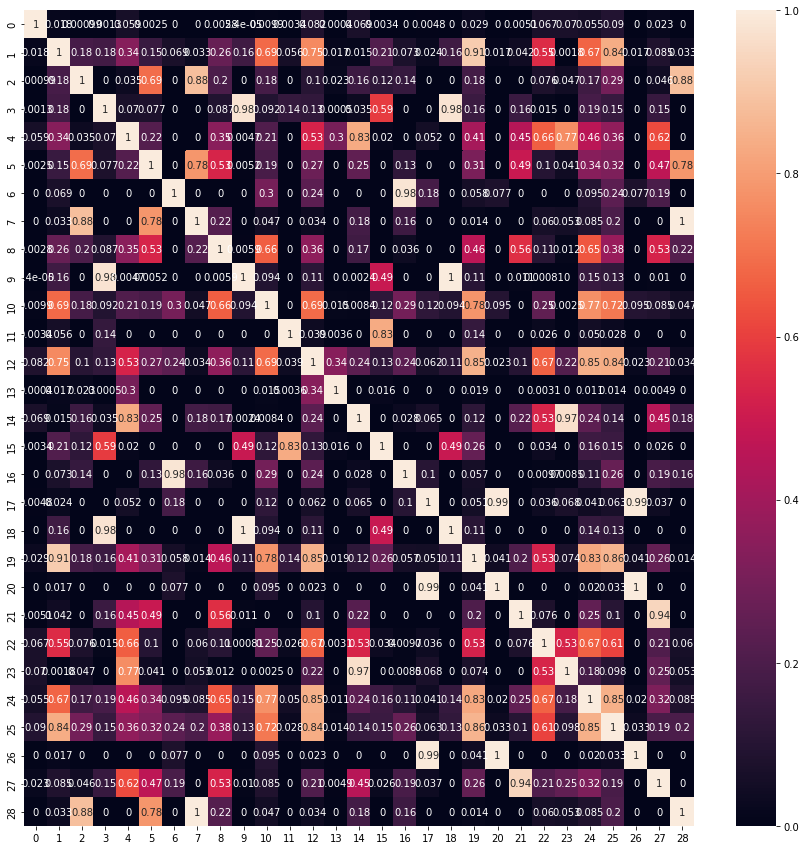

In [103]:
plt.figure(figsize = (15,15))
sns.heatmap(np.array(cos_sim).tolist(), annot=True)